# GATHERING

In [1]:
import pandas as pd

In [2]:
import requests
import os

In [3]:
import json

In [4]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [7]:
img = pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

Loading JSON files as I have trouple with API

In [10]:
jsn = open('tweet-json.txt')
count = 0
df_list = []
while True: 
    count += 1
  
    # Get next line from file 
    line = jsn.readline() 
    if not line: 
        break
    line = line.split(", ")
    for ele in line:
        if ele.startswith('"id": '):
            id = ele.split()[1]
            
        if ele.startswith('"retweet_count": '):
            retweet_count = ele.split()[1]
            
        if ele.startswith('"favorite_count": '):
            favorite_count = ele.split()[1]
    df_list.append({'tweet_id': int(id),
                    'retweet_count': int(retweet_count),
                    'favorite_count': int(favorite_count)})
    # if line is empty 
    # end of file is reached 
    
    print("Line{}: {} -- {} -- {}".format(count, id,retweet_count,favorite_count))
print(len(df_list))
json_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

jsn.close() 

Line1: 892420643555336193 -- 8853 -- 39467
Line2: 892177421306343426 -- 6514 -- 33819
Line3: 891815181378084864 -- 4328 -- 25461
Line4: 891689557279858688 -- 8964 -- 42908
Line5: 891327558926688256 -- 9774 -- 41048
Line6: 891087950875897856 -- 3261 -- 20562
Line7: 890971913173991426 -- 2158 -- 12041
Line8: 890729181411237888 -- 16716 -- 56848
Line9: 890609185150312448 -- 4429 -- 28226
Line10: 890240255349198849 -- 7711 -- 32467
Line11: 890006608113172480 -- 7624 -- 31166
Line12: 889880896479866881 -- 5156 -- 28268
Line13: 889665388333682689 -- 8538 -- 38818
Line14: 889638837579907072 -- 4735 -- 27672
Line15: 889531135344209921 -- 2321 -- 15359
Line16: 889278841981685760 -- 5637 -- 25652
Line17: 888917238123831296 -- 4709 -- 29611
Line18: 888804989199671297 -- 4559 -- 26080
Line19: 888554962724278272 -- 3732 -- 20290
Line20: 888078434458587136 -- 3653 -- 22201
Line21: 887705289381826560 -- 5609 -- 30779
Line22: 887517139158093824 -- 12082 -- 46959
Line23: 887473957103951883 -- 18781 -- 

Line657: 791774931465953280 -- 21156 -- 37818
Line658: 791672322847637504 -- 3661 -- 13129
Line659: 791406955684368384 -- 4797 -- 14670
Line660: 791312159183634433 -- 2963 -- 9841
Line661: 763837565564780549 -- 4858 -- 0
Line662: 790987426131050500 -- 2483 -- 11089
Line663: 790946055508652032 -- 5496 -- 18601
Line664: 789986466051088384 -- 2704 -- 0
Line665: 790698755171364864 -- 2203 -- 9158
Line666: 790581949425475584 -- 8183 -- 22473
Line667: 790337589677002753 -- 2167 -- 8740
Line668: 790277117346975746 -- 3732 -- 14081
Line669: 762699858130116608 -- 4190 -- 0
Line670: 789986466051088384 -- 2704 -- 10369
Line671: 762464539388485633 -- 4839 -- 0
Line672: 789903600034189313 -- 4858 -- 11673
Line673: 789628658055020548 -- 2080 -- 8448
Line674: 789599242079838210 -- 2279 -- 7620
Line675: 789530877013393408 -- 3942 -- 13188
Line676: 788818328538099712 -- 2666 -- 9615
Line677: 750719632563142656 -- 5747 -- 0
Line678: 789268448748703744 -- 3014 -- 10196
Line679: 789137962068021249 -- 3244

Line1365: 702671118226825216 -- 634 -- 2398
Line1366: 702598099714314240 -- 3712 -- 11332
Line1367: 702539513671897089 -- 1091 -- 3134
Line1368: 353976298 -- 1755 -- 3491
Line1369: 702321140488925184 -- 1156 -- 3604
Line1370: 702276748847800320 -- 860 -- 2706
Line1371: 702217446468493312 -- 1526 -- 5268
Line1372: 701981390485725185 -- 1106 -- 3755
Line1373: 701952816642965504 -- 1149 -- 4167
Line1374: 701889187134500865 -- 1558 -- 3905
Line1375: 701805642395348998 -- 1900 -- 3752
Line1376: 701601587219795968 -- 523 -- 2299
Line1377: 701570477911896070 -- 1055 -- 3080
Line1378: 701545186879471618 -- 680 -- 2902
Line1379: 701214700881756160 -- 5812 -- 13475
Line1380: 700890391244103680 -- 653 -- 2437
Line1381: 700864154249383937 -- 685 -- 2828
Line1382: 700847567345688576 -- 558 -- 2637
Line1383: 700796979434098688 -- 1085 -- 2669
Line1384: 700747788515020802 -- 10673 -- 25130
Line1385: 700518061187723268 -- 915 -- 2887
Line1386: 700505138482569216 -- 646 -- 2487
Line1387: 70046201097950

Line2109: 670444955656130560 -- 2153 -- 7120
Line2110: 670442337873600512 -- 213 -- 690
Line2111: 670435821946826752 -- 570 -- 1127
Line2112: 670434127938719744 -- 708 -- 1501
Line2113: 670433248821026816 -- 122 -- 345
Line2114: 670428280563085312 -- 694 -- 1484
Line2115: 670427002554466305 -- 179 -- 551
Line2116: 670421925039075328 -- 709 -- 1415
Line2117: 670420569653809152 -- 342 -- 668
Line2118: 670417414769758208 -- 350 -- 604
Line2119: 670411370698022913 -- 991 -- 2176
Line2120: 670408998013820928 -- 249 -- 600
Line2121: 670403879788544000 -- 173 -- 460
Line2122: 670385711116361728 -- 234 -- 593
Line2123: 670374371102445568 -- 295 -- 785
Line2124: 670361874861563904 -- 71 -- 344
Line2125: 670338931251150849 -- 122 -- 451
Line2126: 670319130621435904 -- 1359 -- 4110
Line2127: 670303360680108032 -- 151 -- 452
Line2128: 670290420111441920 -- 315 -- 750
Line2129: 670093938074779648 -- 365 -- 1106
Line2130: 670086499208155136 -- 275 -- 740
Line2131: 670079681849372674 -- 1373 -- 2390


# ASSESS

In [11]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [12]:
json_df = json_df.drop_duplicates()

In [13]:
json_df.tweet_id.value_counts()

4196983835            20
752178371354882049     3
827593379009675264     3
791672322847637504     2
674291837063053312     2
765222098633691136     2
740676976021798912     2
801167903437357056     2
753039830821511168     2
809220051211603969     2
819006400881917954     2
810254108431155201     2
817423860136083457     2
831650051525054464     2
679062614270468097     2
868880397819494401     2
816450570814898180     2
684830982659280897     2
739238157791694849     2
782722598790725632     2
740373189193256964     2
673320132811366400     2
759447681597108224     2
780931614150983680     2
681694085539872773     2
775733305207554048     2
825026590719483904     2
793286476301799424     2
839549326359670784     2
860563773140209665     2
                      ..
670778058496974848     1
718540630683709445     1
673240798075449344     1
847157206088847362     1
674670581682434048     1
705223444686888960     1
727155742655025152     1
743222593470234624     1
697482927769255936     1


In [14]:
json_df.favorite_count.value_counts()

0        178
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [15]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
Sadie           8
the             8
Toby            7
Daisy           7
Bailey          7
Buddy           7
an              7
Leo             6
Koda            6
Bella           6
Dave            6
Scout           6
Jax             6
Milo            6
Rusty           6
Oscar           6
Jack            6
Stanley         6
Finn            5
             ... 
Roscoe          1
Mitch           1
Bobbay          1
Kathmandu       1
Geoff           1
Bluebert        1
Brockly         1
Patch           1
Harry           1
Tessa           1
Mac             1
Binky           1
Sailer          1
Aiden           1
Edmund          1
Willem          1
Winifred        1
Lugan           1
Asher           1
Godi            1
Holly           1
Sprout          1
Clybe           1
Jeb             1
officially

In [17]:
x = (38308544 in archive.tweet_id)
x

False

In [18]:
sum(archive['expanded_urls'].duplicated())

137

In [19]:
archive['new_col'] = archive['expanded_urls'].astype(str).str[:4]

In [20]:
archive['new_col'].head()

0    http
1    http
2    http
3    http
4    http
Name: new_col, dtype: object

In [21]:
archive['expanded_urls'][archive['new_col'] != 'http']

30      NaN
55      NaN
64      NaN
113     NaN
148     NaN
179     NaN
185     NaN
186     NaN
188     NaN
189     NaN
218     NaN
228     NaN
234     NaN
274     NaN
290     NaN
291     NaN
313     NaN
342     NaN
346     NaN
375     NaN
387     NaN
409     NaN
427     NaN
498     NaN
513     NaN
570     NaN
576     NaN
611     NaN
701     NaN
707     NaN
843     NaN
857     NaN
967     NaN
1005    NaN
1080    NaN
1295    NaN
1345    NaN
1445    NaN
1446    NaN
1474    NaN
1479    NaN
1497    NaN
1523    NaN
1598    NaN
1605    NaN
1618    NaN
1663    NaN
1689    NaN
1774    NaN
1819    NaN
1844    NaN
1895    NaN
1905    NaN
1914    NaN
1940    NaN
2038    NaN
2149    NaN
2189    NaN
2298    NaN
Name: expanded_urls, dtype: object

In [22]:
archive.drop(columns='new_col', inplace=True)

In [23]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [24]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

# IMAGE

In [26]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
sum(img.jpg_url.duplicated())

66

In [28]:
img.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

- null values in retweet columns                    +
- in source all the anchore tag is included         +
- +0000 included in time stamp                      +
- in name column there're many values with no info at all ilke 'a'       +
- timestamp is to be datetime not string            +
- 137 duplicated extracted urls in arc              -
- some ids in json file is very small               +
- many id smaller than others in tweet_id (json)    -
- some of names in name are inconvenient            +
- ratings needs to be ivastigated                   +

- dogg0, pupper, puppo, floofer can be melted in one col +
- p1s,p2s,p3s can be melt in 1 col-group            +
- we will group all 3 taples in 1                   +

# CLEANING

We'll first make a copy of our data then handle the issues assessed before

In [29]:
json_df_copy = json_df.copy()

In [30]:
archive_copy = archive.copy()

In [31]:
img_copy = img.copy()

# Missing data in columns

We have so many missing data in ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                                'in_reply_to_status_id','in_reply_to_user_id'] columns so we'll drop them

In [32]:
archive_copy = archive_copy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                                 'in_reply_to_status_id','in_reply_to_user_id'], axis =1)

TESTING

In [33]:
archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

# Getting the source data out of the tag

then we'll extract the source other than being in a tag

In [34]:
archive_copy.source = archive_copy.source.str.extract('>(.*)</a', )

Test

In [35]:
archive_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [36]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


# TimeStamp 2 issues

then we have the timestamp form problem (date +0000) => (date)

In [37]:
archive_copy.timestamp[0]

'2017-08-01 16:23:56 +0000'

In [38]:
archive_copy.timestamp = archive_copy.timestamp.str.extract('(.*) \+0000')

Test

In [39]:
archive_copy.timestamp[0]

'2017-08-01 16:23:56'

then the timestamp type problem

In [40]:
archive_copy.timestamp = pd.to_datetime(archive_copy.timestamp)

In [41]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB


#  Merging tables

then the splited taples problem

In [42]:
complete_arch = pd.merge(archive_copy, img_copy, on=['tweet_id','tweet_id'],how='left')

In [43]:
#check
complete_arch.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [44]:
complete_arch = pd.merge(complete_arch, json_df_copy, on=['tweet_id', 'tweet_id'],how='left')

In [45]:
#check
complete_arch.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,8853.0,39467.0


In [46]:
#check the data types
complete_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 0 to 2508
Data columns (total 25 columns):
tweet_id              2509 non-null int64
timestamp             2509 non-null datetime64[ns]
source                2509 non-null object
text                  2509 non-null object
expanded_urls         2450 non-null object
rating_numerator      2509 non-null int64
rating_denominator    2509 non-null int64
name                  2509 non-null object
doggo                 2509 non-null object
floofer               2509 non-null object
pupper                2509 non-null object
puppo                 2509 non-null object
jpg_url               2217 non-null object
img_num               2217 non-null float64
p1                    2217 non-null object
p1_conf               2217 non-null float64
p1_dog                2217 non-null object
p2                    2217 non-null object
p2_conf               2217 non-null float64
p2_dog                2217 non-null object
p3                    221

In [47]:
#we Faced another problem here I'll write it above

#  Columns number reduction 2 issues

reduce the columns number

In [48]:
#I'll make a copy of the file first
complete_arch_copy = complete_arch.copy()

In [49]:
df = pd.melt(complete_arch_copy, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        value_name = 'dog_type')

In [50]:
#chek
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10036 entries, 0 to 10035
Data columns (total 23 columns):
tweet_id              10036 non-null int64
timestamp             10036 non-null datetime64[ns]
source                10036 non-null object
text                  10036 non-null object
expanded_urls         9800 non-null object
rating_numerator      10036 non-null int64
rating_denominator    10036 non-null int64
name                  10036 non-null object
jpg_url               8868 non-null object
img_num               8868 non-null float64
p1                    8868 non-null object
p1_conf               8868 non-null float64
p1_dog                8868 non-null object
p2                    8868 non-null object
p2_conf               8868 non-null float64
p2_dog                8868 non-null object
p3                    8868 non-null object
p3_conf               8868 non-null float64
p3_dog                8868 non-null object
retweet_count         8896 non-null float64
favorite_count

In [51]:
#drop douplicates
df = df.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [52]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2408 to 8675
Data columns (total 23 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
retweet_count         2071 non-null float64
favorite_count      

In [53]:
df.dog_type.value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_type, dtype: int64

with this we reduced these 4 columns to 1 categorical column
now we will reduce another 9 columns to 2 columns

In [54]:
actual_name = []
accuracy = []

def predicted_name(dfr):
    if dfr['p1_dog'] == True:
        actual_name.append(dfr['p1'])
        accuracy.append(dfr['p1_conf'])
    elif dfr['p2_dog'] == True:
        actual_name.append(dfr['p2'])
        accuracy.append(dfr['p2_conf'])
    elif dfr['p3_dog'] == True:
        actual_name.append(dfr['p3'])
        accuracy.append(dfr['p3_conf'])
    else:
        actual_name.append('Unknown')
        accuracy.append(0)
        
df.apply(predicted_name, axis=1)

df['actual_name'] = actual_name
df['accuracy'] = accuracy

In [55]:
#check
print(df.head(1)['p1'])
df.head(1)

2408    web_site
Name: p1, dtype: object


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,variable,dog_type,actual_name,accuracy
2408,667550882905632768,2015-11-20 03:51:47,Twitter Web Client,RT @dogratingrating: Unoriginal idea. Blatant ...,https://twitter.com/dogratingrating/status/667...,5,10,None,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1.0,...,False,oscilloscope,0.000142,False,NaN,NaN,doggo,None,Unknown,0.0


In [56]:
#check
df = df.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2408 to 8675
Data columns (total 15 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
jpg_url               2075 non-null object
retweet_count         2071 non-null float64
favorite_count        2071 non-null float64
variable              2356 non-null object
dog_type              2356 non-null object
actual_name           2356 non-null object
accuracy              2356 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 294.5+ KB


#  Dropping null values

dropping the rows with null values

In [58]:
df.dropna(inplace=True)

In [59]:
sum(df.jpg_url.isnull())

0

In [60]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1973 entries, 2409 to 8675
Data columns (total 15 columns):
tweet_id              1973 non-null int64
timestamp             1973 non-null datetime64[ns]
source                1973 non-null object
text                  1973 non-null object
expanded_urls         1973 non-null object
rating_numerator      1973 non-null int64
rating_denominator    1973 non-null int64
name                  1973 non-null object
jpg_url               1973 non-null object
retweet_count         1973 non-null float64
favorite_count        1973 non-null float64
variable              1973 non-null object
dog_type              1973 non-null object
actual_name           1973 non-null object
accuracy              1973 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 246.6+ KB


# Drop inappropriate names

droping the 'a, an' names

In [61]:
indexn = df[(df['name'] == 'a') | (df['name'] == 'an')].index

In [62]:
df.drop(indexn , inplace=True)
#check
df.name.value_counts()

None         539
Cooper        10
Oliver        10
Lucy          10
Charlie       10
Penny          9
Sadie          8
Winston        8
Tucker         8
Lola           7
the            7
Toby           7
Daisy          7
Stanley        6
Bella          6
Jax            6
Koda           6
Bo             6
Rusty          5
Louis          5
Scout          5
Bailey         5
Chester        5
Leo            5
Oscar          5
Buddy          5
Dave           5
Milo           5
Dexter         4
Gary           4
            ... 
Bert           1
Suki           1
Canela         1
Rizzo          1
Logan          1
Harry          1
Layla          1
Lugan          1
Jebberson      1
Jerome         1
Gerbald        1
Major          1
Cupid          1
Bones          1
Kirk           1
Cecil          1
Jazzy          1
Nigel          1
Patch          1
Hamrick        1
Crawford       1
Tessa          1
Maks           1
Binky          1
Fwed           1
Gustaf         1
Edmund         1
Oreo          

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1912 entries, 2409 to 8675
Data columns (total 15 columns):
tweet_id              1912 non-null int64
timestamp             1912 non-null datetime64[ns]
source                1912 non-null object
text                  1912 non-null object
expanded_urls         1912 non-null object
rating_numerator      1912 non-null int64
rating_denominator    1912 non-null int64
name                  1912 non-null object
jpg_url               1912 non-null object
retweet_count         1912 non-null float64
favorite_count        1912 non-null float64
variable              1912 non-null object
dog_type              1912 non-null object
actual_name           1912 non-null object
accuracy              1912 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 239.0+ KB


#  Check the id size

In [64]:
ids = df.tweet_id

In [65]:
len(str(ids[2409]))

18

In [66]:
import numpy as np

In [67]:
invalid_ids = []
for index, ide in ids.items():
    if len(str(ide)) < 18:
        invalid_ids.append(ide)
        print(id, end=" ,") 


In [68]:
#looks like there were removed with dropna function

In [69]:
sum(df.expanded_urls.duplicated())

0

In [70]:
#the duplicated urls were removed too

# Checking the ratings

looking at ratings

In [71]:
df[['rating_denominator', 'rating_numerator']][df.rating_denominator > 10]

,rating_denominator,rating_numerator
4063,40,44
3739,170,204
3785,20,4
3681,11,9
3897,50,45
3877,80,80
3823,50,50
3849,90,99
4271,110,121
4270,130,143


In [72]:
df[['rating_denominator', 'rating_numerator']][df.rating_numerator > 14]

,rating_denominator,rating_numerator
4063,40,44
3739,170,204
3897,50,45
3877,80,80
3823,50,50
3849,90,99
4727,10,420
4353,10,26
4271,110,121
4270,130,143


- from what i see these values are measured with diffrent denominator for some reason
- so for analysis purpose I'll add a column were they are devided and drop the numerator column only and leave the denominator column

In [73]:
df['ratings'] = df.rating_numerator / df.rating_denominator
#check
df.ratings.value_counts()

1.200000      445
1.000000      406
1.100000      386
1.300000      253
0.900000      140
0.800000       90
0.700000       45
0.500000       32
1.400000       32
0.600000       31
0.300000       17
0.400000       12
0.200000        9
0.100000        4
0.000000        2
177.600000      1
2.600000        1
3.428571        1
0.636364        1
0.818182        1
7.500000        1
42.000000       1
2.700000        1
Name: ratings, dtype: int64

In [74]:
df.drop(columns='rating_numerator', inplace=True)

In [75]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_denominator', 'name', 'jpg_url', 'retweet_count',
       'favorite_count', 'variable', 'dog_type', 'actual_name', 'accuracy',
       'ratings'],
      dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1912 entries, 2409 to 8675
Data columns (total 15 columns):
tweet_id              1912 non-null int64
timestamp             1912 non-null datetime64[ns]
source                1912 non-null object
text                  1912 non-null object
expanded_urls         1912 non-null object
rating_denominator    1912 non-null int64
name                  1912 non-null object
jpg_url               1912 non-null object
retweet_count         1912 non-null float64
favorite_count        1912 non-null float64
variable              1912 non-null object
dog_type              1912 non-null object
actual_name           1912 non-null object
accuracy              1912 non-null float64
ratings               1912 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(8)
memory usage: 319.0+ KB


In [77]:
df.drop(columns='variable', inplace=True)

In [78]:
## saving the csv file
df.to_csv('twitter_archive_master.csv')

In [79]:
# getting the algorithm accuracy using mean(accuracy)    +
# getting the prefered dog from (ratings & names)        + 
# getting most popular dog from the name frequency       +
# plotting the usage frequency for the site              -
# plooting how many users from each device               +


In [80]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_denominator', 'name', 'jpg_url', 'retweet_count',
       'favorite_count', 'dog_type', 'actual_name', 'accuracy', 'ratings'],
      dtype='object')

In [81]:
df.actual_name.value_counts()

Unknown                           293
golden_retriever                  156
Labrador_retriever                106
Pembroke                           90
Chihuahua                          88
pug                                60
toy_poodle                         47
chow                               46
Pomeranian                         40
Samoyed                            39
malamute                           32
French_bulldog                     31
Chesapeake_Bay_retriever           30
cocker_spaniel                     28
miniature_pinscher                 24
Staffordshire_bullterrier          21
Cardigan                           21
Eskimo_dog                         21
Shih-Tzu                           20
beagle                             20
German_shepherd                    19
Rottweiler                         19
Siberian_husky                     19
Maltese_dog                        18
Shetland_sheepdog                  18
Lakeland_terrier                   18
basset      

In [82]:
indexn = df[(df['actual_name'] == 'Unknown')].index
df_plot = df.drop(indexn)
#check
df_plot.actual_name.value_counts()

golden_retriever                  156
Labrador_retriever                106
Pembroke                           90
Chihuahua                          88
pug                                60
toy_poodle                         47
chow                               46
Pomeranian                         40
Samoyed                            39
malamute                           32
French_bulldog                     31
Chesapeake_Bay_retriever           30
cocker_spaniel                     28
miniature_pinscher                 24
Eskimo_dog                         21
Staffordshire_bullterrier          21
Cardigan                           21
Shih-Tzu                           20
beagle                             20
Rottweiler                         19
Siberian_husky                     19
German_shepherd                    19
Shetland_sheepdog                  18
Lakeland_terrier                   18
Maltese_dog                        18
basset                             17
American_Sta

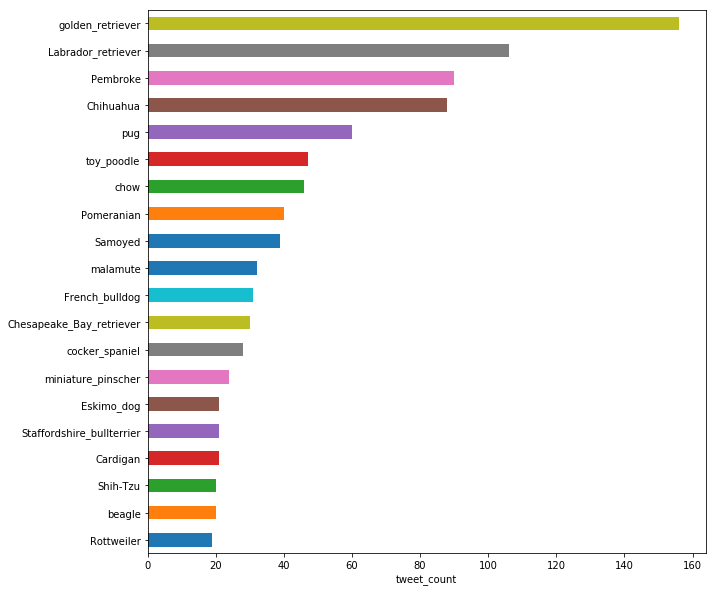

In [92]:
df_plot.actual_name.value_counts().sort_values()[-20:].plot(kind='barh', figsize = (10,10)).set_xlabel("tweet_count");


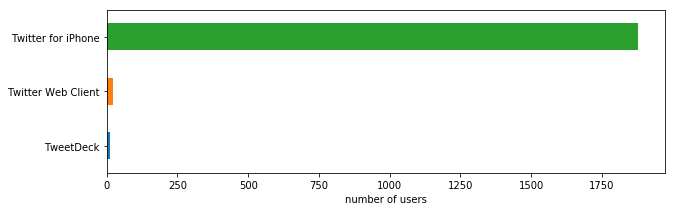

In [91]:
df.source.value_counts().sort_values().plot(kind='barh', figsize = (10,3)).set_xlabel("number of users");

In [85]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_denominator', 'name', 'jpg_url', 'retweet_count',
       'favorite_count', 'dog_type', 'actual_name', 'accuracy', 'ratings'],
      dtype='object')

In [86]:
x=[]
for i in df_plot.actual_name.value_counts().index:
    y = df[df.actual_name==i].accuracy.mean()
    x.append({'dog': i,
            'acc': y})
    print(i,'--',y)

golden_retriever -- 0.649923742863
Labrador_retriever -- 0.587997829517
Pembroke -- 0.676720905556
Chihuahua -- 0.522161840795
pug -- 0.68504691967
toy_poodle -- 0.464819447234
chow -- 0.529037110652
Pomeranian -- 0.68608825
Samoyed -- 0.736270369231
malamute -- 0.5279581875
French_bulldog -- 0.662572858065
Chesapeake_Bay_retriever -- 0.43828967
cocker_spaniel -- 0.481066627143
miniature_pinscher -- 0.470666708333
Eskimo_dog -- 0.378021247619
Staffordshire_bullterrier -- 0.446154771429
Cardigan -- 0.486599352381
Shih-Tzu -- 0.51006715
beagle -- 0.4887584053
Rottweiler -- 0.517592115789
Siberian_husky -- 0.476249789474
German_shepherd -- 0.703343894737
Shetland_sheepdog -- 0.605423192667
Lakeland_terrier -- 0.443944162222
Maltese_dog -- 0.625069755556
basset -- 0.522428090735
American_Staffordshire_terrier -- 0.527359125
Italian_greyhound -- 0.4059370625
Old_English_sheepdog -- 0.506367985333
soft-coated_wheaten_terrier -- 0.418760966667
West_Highland_white_terrier -- 0.564100006667
kuv

In [87]:
ploty = pd.DataFrame(x, columns = ['dog', 'acc'])

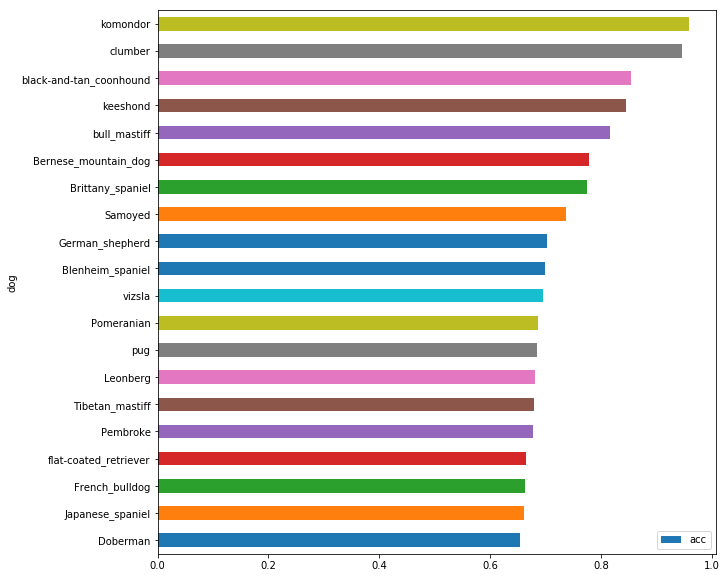

In [88]:
ploty.sort_values('acc')[-20:].plot(x ='dog', y='acc', kind = 'barh', figsize=(10,10))


In [89]:
ploty.acc.max()

0.95881850000000002

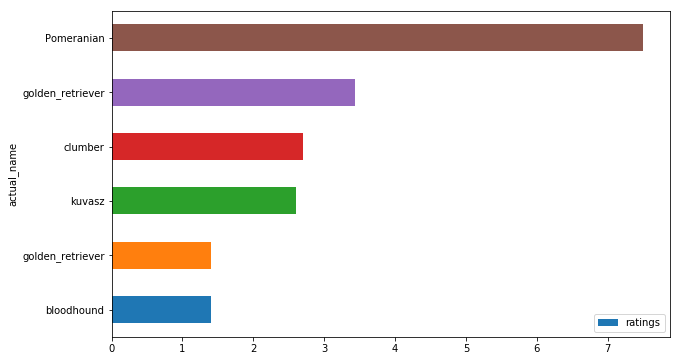

In [98]:
df_plot.sort_values('ratings')[-6:].plot(x ='actual_name', y='ratings', kind = 'barh', figsize=(10,6))

In [97]:
df.actual_name.value_counts()

Unknown                           293
golden_retriever                  156
Labrador_retriever                106
Pembroke                           90
Chihuahua                          88
pug                                60
toy_poodle                         47
chow                               46
Pomeranian                         40
Samoyed                            39
malamute                           32
French_bulldog                     31
Chesapeake_Bay_retriever           30
cocker_spaniel                     28
miniature_pinscher                 24
Staffordshire_bullterrier          21
Cardigan                           21
Eskimo_dog                         21
Shih-Tzu                           20
beagle                             20
German_shepherd                    19
Rottweiler                         19
Siberian_husky                     19
Maltese_dog                        18
Shetland_sheepdog                  18
Lakeland_terrier                   18
basset      

In [102]:
ploty.sort_values('acc').tail()

,dog,acc
73,bull_mastiff,0.815618
82,keeshond,0.844431
108,black-and-tan_coonhound,0.854861
111,clumber,0.946718
101,komondor,0.958819
